In [1]:
from maws.model_builder import build_model
from torchtext.utils import get_asset_local_path
from PIL import Image
from IPython.display import display
import torchvision.transforms
from maws.inference_utils import start_inference_mode

In [12]:
start_inference_mode(device="cpu")

In [40]:
clip_model = build_model("vit_b16_xlmr_b", "maws_clip")
# clip_model = build_model("vit_l16_xlmr_l", "maws_clip")
# clip_model = build_model("vit_h14_xlmr_l", "maws_clip")
# clip_model = build_model("vit_2b14_xlmr_l", "maws_clip")
_ = clip_model.eval()



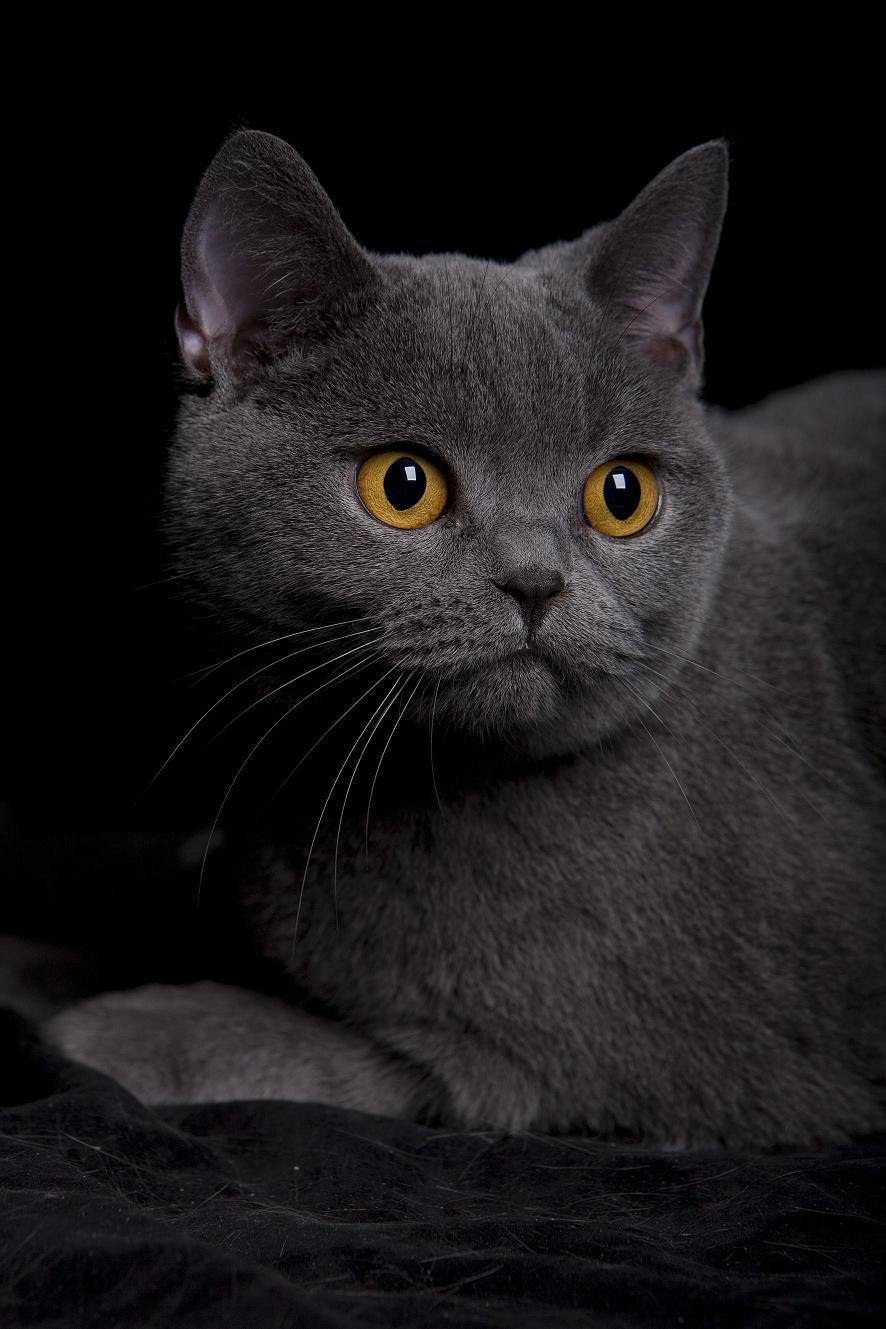

In [41]:
image = Image.open(get_asset_local_path("https://upload.wikimedia.org/wikipedia/commons/5/53/Sheba1.JPG")).convert("RGB")
display(image)

In [42]:
image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(size=224, interpolation=3),
        torchvision.transforms.CenterCrop(size=224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
    ]
)

In [43]:
# english
texts = [
    "a dog",
    "a cat",
    "a mouse",
    "a truck",
    "a plane",
]

print((clip_model.classify(image_transform(image).unsqueeze(0), texts) * 100).tolist())

[[0.42655473947525024, 89.6343765258789, 9.344010353088379, 0.48280438780784607, 0.11225719749927521]]


In [44]:
# french
texts = [
    "un chien",
    "un chat",
    "une souris",
    "un camion",
    "un avion",
]

print((clip_model.classify(image_transform(image).unsqueeze(0), texts) * 100).tolist())

[[0.4897313714027405, 92.72753143310547, 6.432736873626709, 0.20018728077411652, 0.14981156587600708]]


In [45]:
# hindi
texts = [
    "एक कुत्ता",
    "एक बिल्ली",
    "एक चूहा",
    "एक ट्रक",
    "एक हवाई जहाज",
]

print((clip_model.classify(image_transform(image).unsqueeze(0), texts) * 100).tolist())

[[1.9921103715896606, 92.52577209472656, 2.360900402069092, 1.0272319316864014, 2.093984842300415]]


In [46]:
# german
texts = [
    "ein Hund",
    "eine Katze",
    "eine Maus",
    "ein LKW",
    "ein Flugzeug",
]

print((clip_model.classify(image_transform(image).unsqueeze(0), texts) * 100).tolist())

[[0.8744330406188965, 93.85449981689453, 3.50126314163208, 1.5451905727386475, 0.22461795806884766]]


In [47]:
# emojis
texts = [
    "🐶",
    "🐱",
    "🐁",
    "🚗",
    "⛴️",
]

print((clip_model.classify(image_transform(image).unsqueeze(0), texts) * 100).tolist())

[[0.5795016884803772, 95.68807220458984, 2.9328672885894775, 0.3446083068847656, 0.4549580514431]]
